# Applied Time Series Analysis Lab 3
### John Hennin, 2021-03-03

#### **Required Packages**
* tswge (Woodward, 2016)

## Introduction

####**Definition of Filtering:** 
When you filter something you first set a criteria or manipulation (removing NaNs, tripling all pixel values above 50 and below 80, etc.), then you apply it to your data and use the output for visualization, analysis, better efficiency, etc. The output should be similar to the input, but without the information that didn’t fit the criteria. Filtering is important for extracting and separating valuable/relevant information from invaluable/irrelevant information. For example, if you have an image dataset of all dog breeds and you want to solely look at the features of French bulldogs, then you should filter through your dataset to extract all images of French bulldogs.

####**Other Examples:** 

**Convolutional Neural Networks**

Convolutional Neural Networks (CNNs) use convolutional layers to filter through the input image and extract a pixel pattern that hopefully represents a relevant feature for the CNN to accurately perform its regression or classification task (usually it's the latter). For example, if it was distinguishing between cats and dogs, a convolutional filter that could recognize triangles (like the triangular ear of a cat) could aid the neural network in its classification.

**Pandas dropna()** (The Pandas Development Team, 2021)

The pandas function dropna() filters a pandas DataFrame and removes all rows or columns with missing data. This allows for clean and gapless automated analysis that may be impossible or inaccurate with missing data values (such as averaging, since the average of {1, na, 3} could be considered 4/3 instead of 4/2, as there are technically three items in the set).

## Methods

### Data

cement from the TSWGE library (Woodward, 2016)
https://www.rdocumentation.org/packages/tswge/versions/1.0.0/topics/cement
**Description:** "Quarterly usage of metric tons (in thousands) of Portland cement used from the first quarter of 1973
through the fourth quarter of 1993 in Australia." (Woodward, 2016)

**Summary Statistics:**

Number of Samples: 84 (from num.samples below)

Sampling Rate: Quarterly (4 groups of 3 months each year)

Units: Metric tons (thousands)

In [ ]:
install.packages("tswge")
library("tswge")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘signal’, ‘PolynomF’, ‘waveslim’, ‘astsa’




In [ ]:
# Load the data
data(cement)
cement

[1] 1148 1305 1342 1452 1184 1352 1316 1353 1121 1297 1318 1281 1109 1299 1341
[16] 1290 1101 1284 1321 1317 1122 1261 1312 1298 1202 1302 1377 1359 1232 1386
[31] 1440 1439 1282 1573 1533 1651 1347 1575 1475 1357 1086 1158 1279 1313 1166
[46] 1373 1456 1496 1251 1456 1631 1554 1347 1516 1546 1564 1333 1458 1499 1613
[61] 1416 1625 1770 1791 1622 1719 1972 1893 1575 1644 1658 1668 1343 1441 1444
[76] 1497 1267 1501 1538 1569 1450 1569 1648 1777

In [ ]:
# Find number of samples
num.samples = length(cement)
num.samples

[1] 84

### Applying Filters

In [ ]:
# Low-pass
cement.low <- butterworth.wge(cement, type = 'low', cutoff = .3, plot = FALSE)

# High-pass
cement.high <- butterworth.wge(cement, type = 'high', cutoff = .18, plot = FALSE)

### Convert to Time Series for Plotting Later

In [ ]:
# Original
cement.ts <- ts(cement, start=c(1973), end=c(1993, 4), frequency=4)

# Low-pass
cement.low.ts <- ts(cement.low$x.filt, start=c(1973), end=c(1993, 4), frequency=4)

# High-pass
cement.high.ts <- ts(cement.high$x.filt, start=c(1973), end=c(1993, 4), frequency=4)

## Results

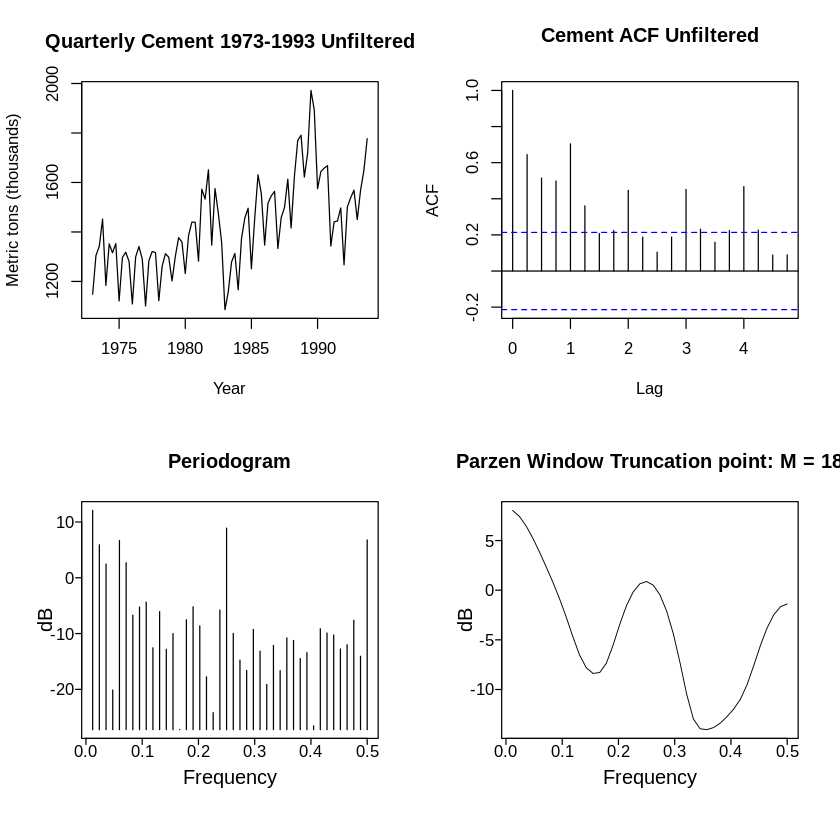

In [ ]:
# Realization, autocorrelation function, periodogram, and Parzen window of unfiltered data
par(mfrow=c(2,2))
plot.cement <- plot(cement.ts, main = 'Quarterly Cement 1973-1993 Unfiltered', ylab = 'Metric tons (thousands)', xlab = 'Year')
acf.cement <- acf(cement.ts, main = 'Cement ACF Unfiltered')
period.cement <- period.wge(cement.ts)
parzen.cement <- parzen.wge(cement.ts)

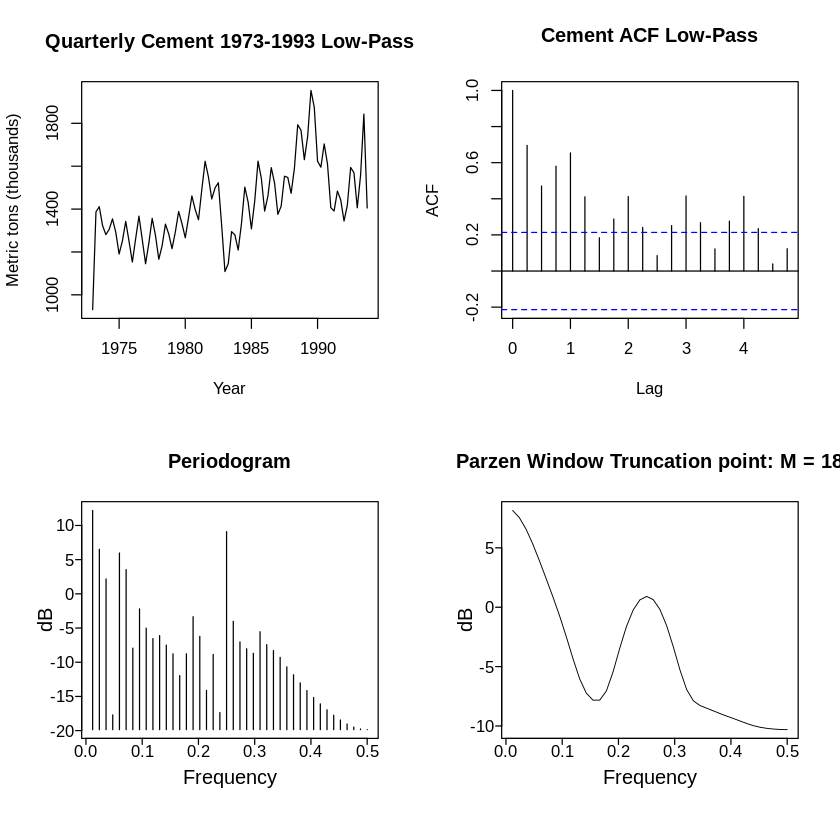

In [ ]:
# Realization, autocorrelation function, periodogram, and Parzen window of low-pass filtered data
par(mfrow=c(2,2))
plot.cement.low <- plot(cement.low.ts, main = 'Quarterly Cement 1973-1993 Low-Pass', ylab = 'Metric tons (thousands)', xlab = 'Year')
acf.cement.low <- acf(cement.low.ts, main = 'Cement ACF Low-Pass')
period.cement.low <- period.wge(cement.low.ts)
#title(main = 'Cement Periodogram Low-Pass')
parzen.cement.low <- parzen.wge(cement.low.ts)
#title(main = 'Cement Parzen Window Low-Pass M = 18')

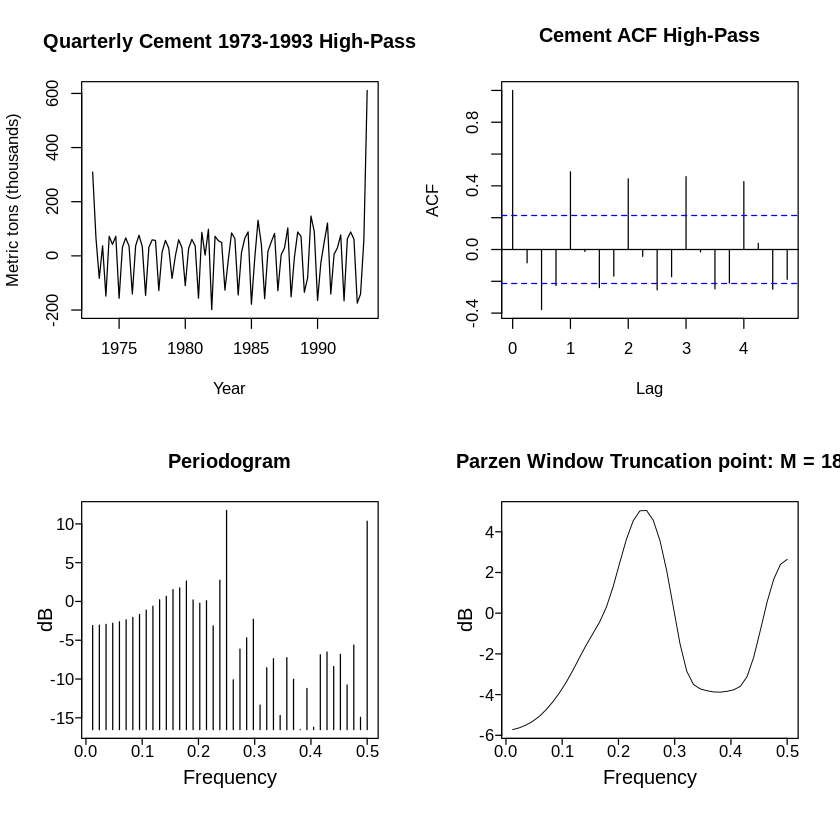

In [ ]:
# Realization, autocorrelation function, periodogram, and Parzen window of high-pass filtered data
par(mfrow=c(2,2))
plot.cement.high <- plot(cement.high.ts, main = 'Quarterly Cement 1973-1993 High-Pass', ylab = 'Metric tons (thousands)', xlab = 'Year')
acf.cement.high <- acf(cement.high.ts, main = 'Cement ACF High-Pass')
period.cement.high <- period.wge(cement.high.ts)
parzen.cement.high <- parzen.wge(cement.high.ts)

# Discussion/Conclusion

Based on the periodogram, the original, unfiltered realization had a quite clear dominant frequency of roughly .245, which is a period of about 4 quarter-years or, simply, 1 year. Unfortunately, the data doesn't seem stationary, as it has a slight upwards trend. Interestingly, filtering out frequencies of .18 and below with a high-pass filter makes the realization almost stationary, as you can see in the corresponding plot. It makes a deviation from stationarity at the beginning and end, but everything else is quite stationary, with a much clearer dominant frequency at, again, roughly .245. This is likely because the low frequencies (the higher periods) were removed, so there's no macro-level shift in the data, or trend. Similarly, the low-pass filter removed all frequencies of .3 and above, so the low period deviations (the tiny hills and valleys like the one shown in roughly 1973 of the original realization plot) are removed and the realization seems much cleaner and without the higher frequency noise. The results were not what I expected, but in hindsight seem a bit obvious. Notably, the ACF did not change much with the low-pass filter, which makes sense, as the realization itself didn't change very much and only the smaller frequencies were removed. However, the ACF of the high-pass filter is very different than the original, likely because removing the lower frequencies had a much more dramatic effect on the realization itself, going from somewhat non-stationary to very nearly stationary. Both the high-pass and low-pass filters removed the half-peaks at the beginning and end of the original Parzen window and periodogram.

# References
1. Wayne Woodward (2016). tswge: Applied Time Series Analysis. R package version 1.0.0. https://CRAN.R-project.org/package=tswge
1. The Pandas Development Team. (2021). pandas.DataFrame.dropna—Pandas 1.2.4 documentation. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

